In [30]:
import matplotlib.pyplot as plt
import numpy

In [31]:
X_VALUES = []
Y_VALUES = []
REP_START_FINISH = [
    (30, 35,),
    (35, 40,),
]
with open('pushups.dat') as file:
    for line in file:
        measurement = tuple(float(value) for value in line.split())
        X_VALUES.append(measurement[0])
        Y_VALUES.append(measurement[1])


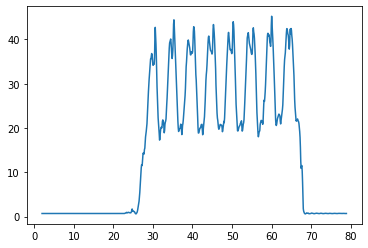

In [32]:
plt.plot(X_VALUES, Y_VALUES)

rep0 -> 4.6s
rep1 -> 4.4s
rep2 -> 5.2s
rep3 -> 5.0s
rep4 -> 4.9s
rep5 -> 4.7s
rep6 -> 4.6s


IndexError: list index out of range

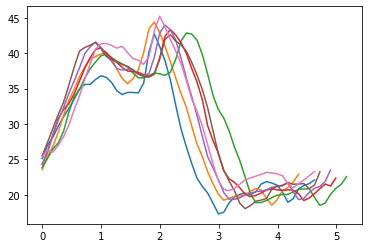

In [72]:
def get_idx_at_time(t):
    idx = 0
    while X_VALUES[idx] < t:
        idx += 1
    return idx

def get_idx_at_value(val):

    def search(threshold, offset, values):
        # return crossing on the rising edge
        idx = offset
        try:
            if values[idx] < threshold:
                while values[idx] < threshold:
                    idx += 1
                return idx
            else:
                while values[idx] >= threshold:
                    idx += 1
                return search(threshold, idx, values)
        except IndexError:
            return None

    idx = 0
    result = []
    while True:
        idx = search(val, idx, Y_VALUES)
        if idx is None:
            break
        result.append(idx)
    return result

start_idx = get_idx_at_time(26)
finish_idx = get_idx_at_time(33)
# plt.plot(X_VALUES[start_idx:finish_idx], Y_VALUES[start_idx:finish_idx])

crossing_points = get_idx_at_value(23.5)
idx = 0
while (idx + 1) < len(crossing_points):
    y_series = numpy.array(
        Y_VALUES[crossing_points[idx]:crossing_points[idx + 1]]
    )
    x_series = numpy.array(
        X_VALUES[crossing_points[idx]:crossing_points[idx + 1]]
    )
    x_series -= x_series[0]
    print(f"rep{idx} -> {x_series[-1]:.1f}s")
    idx += 1
    plt.plot(x_series, y_series)